# Plots and data summaries for manuscript

Haziq Jamil

## Load data

In [ ]:
#| echo: true
#| eval: true
#| file: data.R
library(tidyverse)
library(bruneimap)
library(gt)
library(gtsummary)
library(lubridate)
library(GGally)

# Main data set
hsp <- 
  read_csv("data/hspbn_2024-12-12.csv") |>
  mutate(
    type = factor(type, levels = c("Detached", "Semi-Detached", "Terrace",
                                   "Apartment", "Land")),
    tenure = factor(tenure, levels = c("Freehold", "Leasehold", "Strata")),
    status = factor(status, levels = c("Proposed", "Under Construction", "New", "Resale")),
    date = as.Date(date, format = "%d/%m/%y"),
    quarter = zoo::as.yearqtr(quarter)
  )

Rows: 31495 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): quarter, kampong, mukim, district, type, tenure, status, agent, s...
dbl   (7): id, price, plot_area, floor_area, storeys, beds, baths
date  (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 38 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): quarter
dbl (1): rppi

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

## Summary of variables

In [ ]:
#| label: tbl-summary
#| tbl-cap: Summary of housing data.
hsp |>
  mutate(
    price = price / 1000,
    storeys = factor(
      ifelse(storeys >= 3, "3+", as.character(storeys)),
      levels = c("1", "2", "3+")
    )
  ) |>
  tbl_summary(
    include = c(price:baths),
    by = district,
    missing = "no", 
    type = all_continuous() ~ "continuous2",
    statistic = list(
      all_continuous2() ~ c("{mean} ({sd})", Range = "{min} - {max}", "{median} ({p25}, {p75})")
    ),
    label = list(
      price = "Price (BND 1,000)",
      type = "Property type",
      plot_area = "Plot area (acres)",
      floor_area = "Floor area (sq. ft.)",
      storeys = "Number of storeys",
      status = "Development status",
      tenure = "Land tenure",    
      beds = "Number of bedrooms",
      baths = "Number of bathrooms"
    ),
    digits = list(
      baths = 1,
      beds = 1
    )
  ) |>
  add_overall() |>
  add_n() |>
  modify_header(label ~ "**Variable**")

Variable,N,"Overall N = 31,4951","Belait N = 1,5131","Brunei Muara N = 28,8941",Temburong N = 2981,Tutong N = 7901
"Price (BND 1,000)","31,495",,,,,
Mean (SD),,340 (380),372 (209),339 (392),419 (323),260 (87)
Min - Max,,"70 - 13,800","98 - 2,800","70 - 13,800","118 - 1,800",116 - 680
"Median (Q1, Q3)",,"285 (230, 380)","320 (268, 400)","285 (230, 380)","390 (250, 430)","245 (198, 310)"
Property type,"27,592",,,,,
Detached,,"17,685 (64%)",524 (41%),"16,548 (65%)",81 (56%),532 (75%)
Semi-Detached,,"3,808 (14%)",97 (7.6%),"3,574 (14%)",7 (4.8%),130 (18%)
Terrace,,"4,502 (16%)",219 (17%),"4,183 (16%)",54 (37%),46 (6.5%)
Apartment,,"1,582 (5.7%)",424 (33%),"1,151 (4.5%)",3 (2.1%),4 (0.6%)
Land,,15 (<0.1%),4 (0.3%),10 (<0.1%),0 (0%),1 (0.1%)


## Correlations

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 16913 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 10319 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 15477 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 14532 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 16710 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 11610 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 7914 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 14632 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 4527 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 11538 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 7914 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 14632 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 4527 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 11538 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for 

(`stat_density()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_density()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_density()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_density()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_smooth()`).

(`geom_point()`).

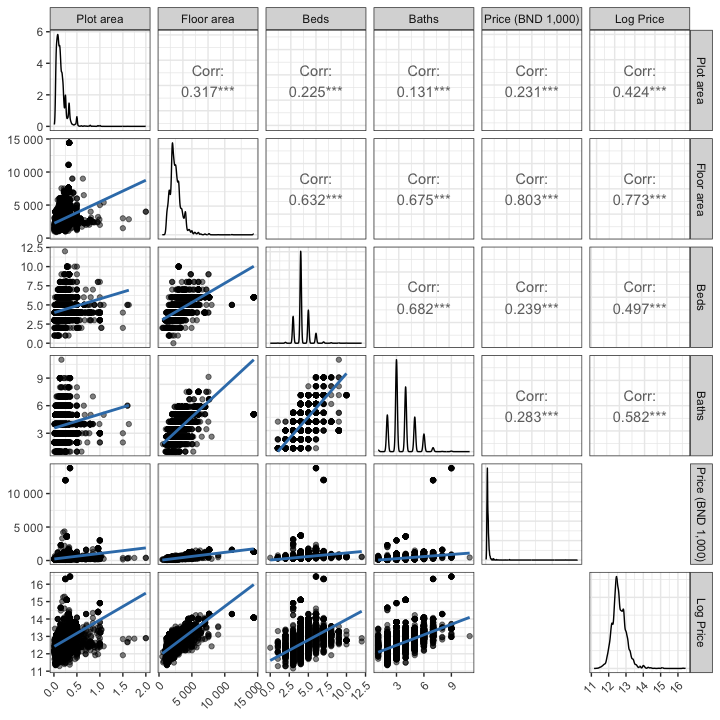

In [ ]:
#| label: fig-corr
#| fig-cap: Pairwise correlation plot of continuous variables.
#| warning: false
#| message: false
#| fig-width: 7.5
#| fig-height: 7.5
#| out-width: 100%

my_fn <- function(data, mapping, method = "lm", ...) {
  ggplot(data = data, mapping = mapping) + 
    geom_point(alpha = 0.5) + 
    geom_smooth(method = method, formula = y ~ x, se = FALSE,
                col = RColorBrewer::brewer.pal(3, "Set1")[2], ...)
}

pm <-
  hsp |>
  mutate(
    logprice = log(price),
    price = price / 1000
  ) |>
  select(
    `Plot area` = plot_area,
    `Floor area` = floor_area,
    Beds = beds,
    Baths = baths,
    `Price (BND 1,000)` = price,
    `Log Price` = logprice
  ) |>
  ggpairs(
    progress = FALSE,
    lower = list(continuous = my_fn)
  ) +
  theme_bw() +
  scale_x_continuous(labels = scales::number) +
  scale_y_continuous(labels = scales::number) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

## Data availability by year

In [ ]:
#| label: tbl-avail
#| tbl-cap: Data availability by year.
hsp |>
  mutate(
    year = year(date),
    missing_price = is.na(price),
    missing_type = is.na(type),
    missing_tenure = is.na(tenure),
    missing_status = is.na(status),
    missing_plot_area = is.na(plot_area),
    missing_floor_area = is.na(floor_area),
    missing_storeys = is.na(storeys),
    missing_beds = is.na(beds),
    missing_baths = is.na(baths),
    missing_housechar = missing_plot_area & missing_floor_area & missing_beds & missing_baths,
    year = year(quarter),
  ) |>
  summarise(
    count = n(),
    spatial = length(unique(mukim)) / nrow(bruneimap::mkm_sf),
    # price = sum(missing_price),
    type = sum(missing_type),
    house_char = sum(missing_housechar),
    source = list(unique(method)),
    .by = year
  ) |>
  mutate(
    `nat-archive` = map_chr(source, ~ ifelse("nat-archive" %in% .x, "✔", "")),
    `online-archive` = map_chr(source, ~ ifelse("online-archive" %in% .x, "✔", "")),
    `web-scrape` = map_chr(source, ~ ifelse("web-scrape" %in% .x, "✔", "")),
    llm = map_chr(source, ~ ifelse("web-scrape-llm" %in% .x, "✔", ""))
  ) |> 
  select(-source) |>
  mutate(across(type:house_char, \(x) x / count)) |>
  gt(rowname_col = "year") |>
  cols_align(
    align = "center",
    columns = `nat-archive`:llm
  ) |>
  tab_spanner(
    label = "Data source",
    columns = `nat-archive`:`web-scrape`
  ) |>
  tab_spanner(
    label = "Missing data severity",
    columns = type:house_char
  ) |>
  fmt_percent(
    spatial:house_char,
    decimals = 1
  ) |>
  cols_label(
    year ~ "Year",
    count ~ "Count",
    spatial ~ "Spatial coverage (mukim)",
    type ~ "Property Type",
    house_char ~ "Property Characteristics",
    `nat-archive` ~ "National Archive",
    `online-archive` ~ "Online Archive",
    `web-scrape` ~ "Web Scraping",
    llm ~ "LLM post-processing"
  ) |>
  grand_summary_rows(
    columns = count:house_char,
    fns = list(Mean = "mean"),
    fmt = list(
      ~ fmt_number(., decimals = 0, columns = "count"),
      ~ fmt_percent(., decimals = 1, columns = c("spatial", "type", "house_char"))
    )
  ) |>
  tab_footnote(
    footnote = paste0("Total number of mukims in Brunei = ", nrow(bruneimap::mkm_sf), "."),
    locations = cells_column_labels(columns = spatial)
  ) |>
  tab_footnote(
    footnote = "Unknown property type.",
    locations = cells_column_labels(columns = type)
  ) |>
  tab_footnote(
    footnote = "Missing all of plot area, floor area, beds, and baths variables.",
    locations = cells_column_labels(columns = house_char)
  ) |>
  tab_options(
    quarto.disable_processing = TRUE,
    grand_summary_row.text_transform = "capitalize"
  ) 

Count 
 Spatial coverage (mukim) 1 
 
 Missing data severity 
 
 
 Data source 
 
 LLM post-processing 
 
 
 Property Type 2 
 Property Characteristics 3 
 National Archive 
 Online Archive 
 Web Scraping 
 
 
 
 1993 
 417 
 23.1% 
 0.0% 
 19.2% 
 ✔ 
 
 
 
 1994 
 654 
 35.9% 
 65.7% 
 28.0% 
 ✔ 
 
 
 
 1995 
 669 
 48.7% 
 66.8% 
 21.2% 
 ✔ 
 
 
 
 1996 
 563 
 35.9% 
 69.8% 
 12.1% 
 ✔ 
 
 
 
 1997 
 385 
 35.9% 
 38.4% 
 26.8% 
 ✔ 
 
 
 
 1998 
 345 
 33.3% 
 36.8% 
 28.7% 
 ✔ 
 
 
 
 1999 
 322 
 35.9% 
 31.4% 
 27.3% 
 ✔ 
 
 
 
 2000 
 379 
 43.6% 
 0.8% 
 4.2% 
 ✔ 
 
 
 
 2001 
 344 
 43.6% 
 0.3% 
 2.3% 
 ✔ 
 
 
 
 2002 
 443 
 43.6% 
 0.0% 
 20.1% 
 ✔ 
 
 
 
 2003 
 454 
 46.2% 
 0.0% 
 13.2% 
 ✔ 
 
 
 
 2004 
 442 
 43.6% 
 0.0% 
 19.0% 
 ✔ 
 
 
 
 2005 
 496 
 46.2% 
 0.0% 
 13.3% 
 ✔ 
 
 
 
 2006 
 661 
 41.0% 
 0.2% 
 11.3% 
 ✔ 
 
 
 
 2007 
 644 
 38.5% 
 0.0% 
 13.0% 
 ✔ 
 
 
 
 2008 
 699 
 41.0% 
 0.3% 
 5.7% 
 ✔ 
 
 
 
 2009 
 542 
 35.9% 
 0.2% 
 3.9% 
 ✔ 
 
 
 
 2010 
 578 
 38.5% 
 0.0% 
 2.1% 
 ✔ 
 
 
 
 2011 
 605 
 38.5% 
 0.2% 
 9.9% 
 ✔ 
 
 
 
 2012 
 937 
 43.6% 
 8.0% 
 4.3% 
 ✔ 
 
 ✔ 
 
 2013 
 888 
 41.0% 
 2.9% 
 26.6% 
 ✔ 
 ✔ 
 ✔ 
 
 2014 
 710 
 46.2% 
 10.6% 
 8.0% 
 
 ✔ 
 ✔ 
 
 2015 
 1121 
 46.2% 
 14.4% 
 4.9% 
 
 ✔ 
 ✔ 
 
 2016 
 1462 
 48.7% 
 13.6% 
 4.6% 
 
 ✔ 
 ✔ 
 
 2017 
 1643 
 48.7% 
 14.4% 
 4.6% 
 
 ✔ 
 ✔ 
 
 2018 
 2880 
 46.2% 
 17.8% 
 0.0% 
 
 
 ✔ 
 
 2019 
 3596 
 43.6% 
 15.9% 
 0.0% 
 
 
 ✔ 
 
 2020 
 1397 
 46.2% 
 10.2% 
 0.0% 
 
 
 ✔ 
 ✔ 
 2021 
 1163 
 53.8% 
 1.9% 
 0.0% 
 
 
 ✔ 
 ✔ 
 2022 
 1324 
 53.8% 
 3.4% 
 0.0% 
 
 
 ✔ 
 ✔ 
 2023 
 1635 
 53.8% 
 2.7% 
 0.0% 
 
 
 ✔ 
 ✔ 
 2024 
 3097 
 53.8% 
 4.4% 
 0.1% 
 
 
 ✔ 
 ✔ 
 mean 
 984 
 42.9% 
 13.5% 
 10.5% 
 — 
 — 
 — 
 — 
 
 
 
 
 1 Total number of mukims in Brunei = 39. 
 
 
 2 Unknown property type. 
 
 
 3 Missing all of plot area, floor area, beds, and baths variables.

## Spatial distribution

Warning in st_point_on_surface.sfc(sf::st_zm(x)): st_point_on_surface may not
give correct results for longitude/latitude data

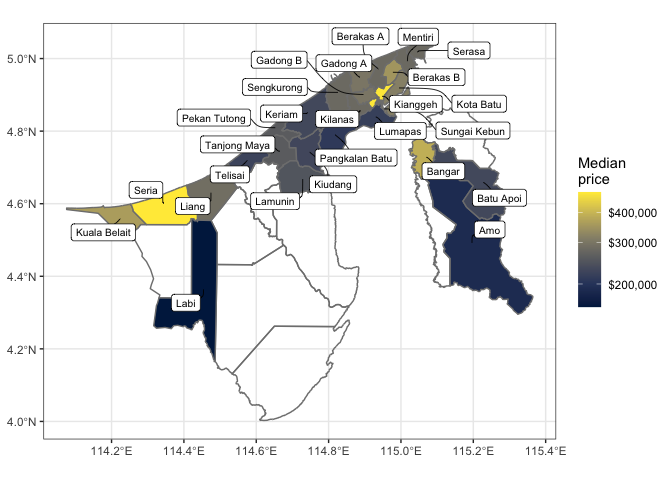

In [ ]:
#| label: fig-spatial
#| fig-cap: Spatial distribution of median property prices by mukim.
#| message: false
#| warning: false
ggplot(hsp_mkm) +
  geom_sf(aes(fill = price), col = "gray50", linewidth = 0.5) +
  scale_fill_viridis_c(
    option = "cividis",
    na.value = "transparent",
    labels = scales::dollar,
    trans = scales::pseudo_log_trans(sigma = 0.001),
    name = "Median\nprice"
  ) +
  ggrepel::geom_label_repel(
    data = drop_na(hsp_mkm, price) |> 
      mutate(mukim = gsub("Mukim ", "", mukim)),
    aes(label = mukim, geometry = geometry),
    size = 2.7,
    stat = "sf_coordinates",
    max.overlaps = Inf,
    min.segment.length = 0,       
    segment.size = 0.3,           
    segment.curvature = 0.1,      
    force = 5                     
  ) +
  labs(x = NULL, y = NULL) +
  theme_bw()

## Price evolution

(`geom_line()`).

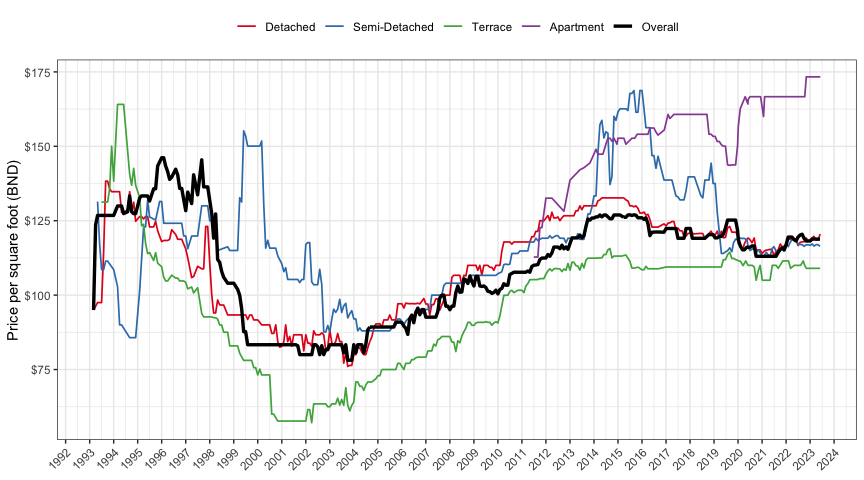

In [ ]:
#| label: fig-price-evolution
#| fig-cap: Median smoothed prices per square foot by property type using a 24-month (8-quarter) rolling window.
#| message: false
#| out-width: 100%
#| fig-height: 5
#| fig-width: 9
slider::slide_period_dfr(hsp_all, hsp_all$date, "month", \(df) {
  df |>
    filter(type != "Land") |>
    summarise(
      date = min(date), 
      price = median(price, na.rm = TRUE),
      plot_area = median(plot_area, na.rm = TRUE),
      floor_area = median(floor_area, na.rm = TRUE),
      .by = type
    )
}, .before = 18, .after = 6) |>
  distinct(date, type, .keep_all = TRUE) |> 
  mutate(
    price_per_sqft = price / floor_area,
    type = factor(type, levels = c("Detached", "Semi-Detached", "Terrace",
                                   "Apartment", "Overall")) 
  ) |>
  ggplot(aes(x = date, y = price_per_sqft, col = type)) +
  geom_line(aes(linewidth = type)) +
  scale_x_date(
    breaks = scales::breaks_width("1 year"), 
    labels = scales::label_date("%Y"),
    name = NULL
  ) +
  scale_y_continuous(
    labels = scales::dollar,
    name = "Price per square foot (BND)"
  ) +
  scale_colour_manual(values = c(RColorBrewer::brewer.pal(4, "Set1"), "black")) +
  scale_linewidth_manual(values = c(rep(0.6, 4), 1.2)) +
  labs(
    col = NULL,
    linewidth = NULL
    # caption = "Median smoothed prices using a 12-month rolling window."
  ) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "top"
  ) 

## RPPI Comparison

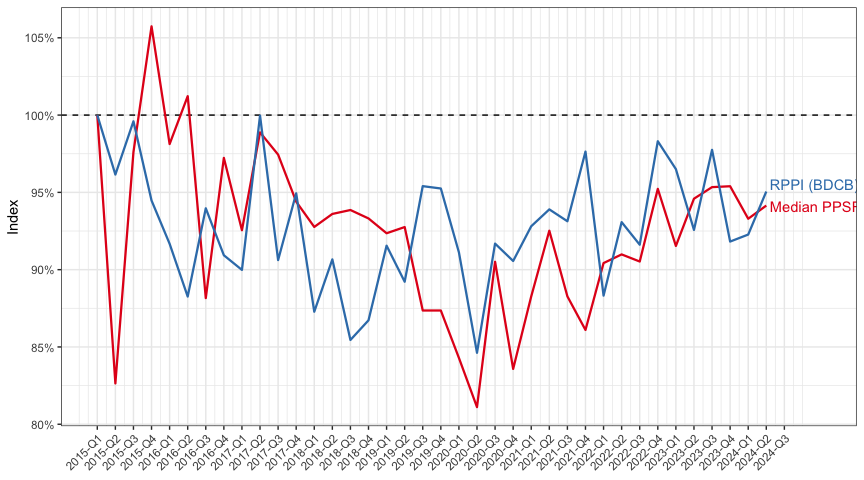

In [ ]:
#| label: fig-rppi
#| fig-cap: Comparison of quarterly median price per square foot indices (Median PPSF) and the official Residential Property Price Index (RPPI) from Brunei Darussalam Central Bank (BDCB).
#| message: false
#| out-width: 100%
#| fig-height: 5
#| fig-width: 9

hsp_rppi |>  
  pivot_longer(c(index, rppi), names_to = "series", values_to = "value") |>
  ggplot(aes(x = quarter, y = value, col = series)) +
  geom_hline(yintercept = 1, linetype = "dashed") +
  geom_line(linewidth = 0.8) +
  scale_colour_brewer(palette = "Set1") +
  scale_y_continuous(labels = scales::percent, name = "Index") +
  zoo::scale_x_yearqtr(
    format = "%Y-Q%q", 
    name = NULL, 
    breaks = seq(2015, 2024.5, by = 0.25)
  ) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none"
  ) +
  geom_text(
    data = tibble(
      quarter = c(2024.3, 2024.3),
      series = c("index", "rppi"),
      value = c(0.941, 0.955),
      label = c("Median PPSF", "RPPI (BDCB)")
    ),
    aes(label = label),
    hjust = 0
  ) +
  coord_cartesian(xlim = c(2015, 2025))